<a href="https://colab.research.google.com/github/Harshvwork/Netflix_Case_Study/blob/main/Netflix_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [ ]:
df = pd.read_csv('netflixdata.csv')

In [ ]:
#first five rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
#Basic information about data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
#Shape of dataframe i.e, rows and columns
print("Shape of data:")
df.shape

Shape of data:


(8807, 12)

In [ ]:
# Data types of all the attributes
print("\nData Types of Attributes:")
print(df.dtypes)


Data Types of Attributes:
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [ ]:
# Columns to un-nest
columns_to_unnest = ['cast', 'listed_in']

# Un-nest specified columns
for column in columns_to_unnest:
    df = df.assign(**{column: df[column].str.split(', ')}).explode(column)

# Display the resulting DataFrame
print(df)

     show_id     type                 title         director  \
0         s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show         Blood & Water              NaN   
1         s2  TV Show         Blood & Water              NaN   
1         s2  TV Show         Blood & Water              NaN   
1         s2  TV Show         Blood & Water              NaN   
...      ...      ...                   ...              ...   
8806   s8807    Movie                Zubaan      Mozez Singh   
8806   s8807    Movie                Zubaan      Mozez Singh   
8806   s8807    Movie                Zubaan      Mozez Singh   
8806   s8807    Movie                Zubaan      Mozez Singh   
8806   s8807    Movie                Zubaan      Mozez Singh   

                       cast        country          date_added  release_year  \
0                       NaN  United States  September 25, 2021          2020   
1                Ama Qamata   South Africa  September 24, 2021         

In [ ]:
#Getting the count of missing values in each column. (Missing values detection)
print(df.isna().sum())

show_id             0
type                0
title               0
director        44621
cast             1504
country         11145
date_added        158
release_year        0
rating             67
duration            3
listed_in           0
description         0
dtype: int64


In [ ]:
# Handling null values for categorical variables
categorical_columns = ['country']
for column in categorical_columns:
    df[column] = df[column].fillna('United States')
print(df)

     show_id     type                 title         director  \
0         s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show         Blood & Water              NaN   
1         s2  TV Show         Blood & Water              NaN   
1         s2  TV Show         Blood & Water              NaN   
1         s2  TV Show         Blood & Water              NaN   
...      ...      ...                   ...              ...   
8806   s8807    Movie                Zubaan      Mozez Singh   
8806   s8807    Movie                Zubaan      Mozez Singh   
8806   s8807    Movie                Zubaan      Mozez Singh   
8806   s8807    Movie                Zubaan      Mozez Singh   
8806   s8807    Movie                Zubaan      Mozez Singh   

                       cast        country          date_added  release_year  \
0                       NaN  United States  September 25, 2021          2020   
1                Ama Qamata   South Africa  September 24, 2021         

In [ ]:

categorical_columns = ['rating']
for column in categorical_columns:
    df[column] = df[column].fillna('TV-MA')
print(df)

     show_id     type                 title         director  \
0         s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show         Blood & Water              NaN   
1         s2  TV Show         Blood & Water              NaN   
1         s2  TV Show         Blood & Water              NaN   
1         s2  TV Show         Blood & Water              NaN   
...      ...      ...                   ...              ...   
8806   s8807    Movie                Zubaan      Mozez Singh   
8806   s8807    Movie                Zubaan      Mozez Singh   
8806   s8807    Movie                Zubaan      Mozez Singh   
8806   s8807    Movie                Zubaan      Mozez Singh   
8806   s8807    Movie                Zubaan      Mozez Singh   

                       cast        country          date_added  release_year  \
0                       NaN  United States  September 25, 2021          2020   
1                Ama Qamata   South Africa  September 24, 2021         

In [ ]:

# Handling null values for continuous variables
continuous_columns = ['duration']
for column in continuous_columns:
    df[column] = df[column].fillna(0)
print(df)

     show_id     type                 title         director  \
0         s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show         Blood & Water              NaN   
1         s2  TV Show         Blood & Water              NaN   
1         s2  TV Show         Blood & Water              NaN   
1         s2  TV Show         Blood & Water              NaN   
...      ...      ...                   ...              ...   
8806   s8807    Movie                Zubaan      Mozez Singh   
8806   s8807    Movie                Zubaan      Mozez Singh   
8806   s8807    Movie                Zubaan      Mozez Singh   
8806   s8807    Movie                Zubaan      Mozez Singh   
8806   s8807    Movie                Zubaan      Mozez Singh   

                       cast        country          date_added  release_year  \
0                       NaN  United States  September 25, 2021          2020   
1                Ama Qamata   South Africa  September 24, 2021         

In [ ]:
# Remove entries with '84 min,' '74 min,' and '66 min' in the rating column
df = df[~df['rating'].str.contains('\d+ min')]

# Display the updated DataFrame
print(df)


     show_id     type                 title         director  \
0         s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show         Blood & Water              NaN   
1         s2  TV Show         Blood & Water              NaN   
1         s2  TV Show         Blood & Water              NaN   
1         s2  TV Show         Blood & Water              NaN   
...      ...      ...                   ...              ...   
8806   s8807    Movie                Zubaan      Mozez Singh   
8806   s8807    Movie                Zubaan      Mozez Singh   
8806   s8807    Movie                Zubaan      Mozez Singh   
8806   s8807    Movie                Zubaan      Mozez Singh   
8806   s8807    Movie                Zubaan      Mozez Singh   

                       cast        country          date_added  release_year  \
0                       NaN  United States  September 25, 2021          2020   
1                Ama Qamata   South Africa  September 24, 2021         

In [ ]:
#1.a.
# Non-graphical analysis for "type"
type_counts = df['type'].value_counts()
print("Counts for 'type' column:")
print(type_counts)

country_counts = df['country'].value_counts().sort_values(ascending=False)
print("Counts for 'country' column (sorted):")
print(country_counts)

# Non-graphical analysis for "rating"
rating_counts = df['rating'].value_counts()
print("\nCounts for 'rating' column:")
print(rating_counts)

Counts for 'type' column:
Movie      101689
TV Show     47820
Name: type, dtype: int64
Counts for 'country' column (sorted):
United States                                                   49693
India                                                           19816
Japan                                                            6584
United Kingdom                                                   5180
South Korea                                                      4234
                                                                ...  
Netherlands, United States                                          1
Canada, India, Thailand, United States, United Arab Emirates        1
United States, Denmark                                              1
United States, Australia, China                                     1
France, New Zealand                                                 1
Name: country, Length: 748, dtype: int64

Counts for 'rating' column:
TV-MA       56762
TV-14       38644

In [ ]:
# How has the number of movies released per year changed over the last 20-30 years?
movies_per_year = df[df['type'] == 'Movie'].groupby('release_year').size()
print("\nNumber of Movies Released per Year:")
movies_per_year.tail(10)


Number of Movies Released per Year:


release_year
2012-01-01     3200
2013-01-01     4035
2014-01-01     4450
2015-01-01     6526
2016-01-01     9521
2017-01-01    10728
2018-01-01    11726
2019-01-01     9122
2020-01-01     8064
2021-01-01     4285
dtype: int64

In [ ]:
# Filter data for the years 2016 and 2018
filtered_data = df[(df['release_year'].dt.year >= 2016) & (df['release_year'].dt.year <= 2018)]

# Split genres (assuming genres are separated by commas) and stack them
genres_stacked = filtered_data['listed_in'].str.split(', ').explode()

# Count the occurrences of each genre
genre_counts = genres_stacked.value_counts()

# Display the genres with the maximum production
max_genres = genre_counts[genre_counts == genre_counts.max()]
print("Genres with Maximum Production from 2016 to 2018:")
print(max_genres)

Genres with Maximum Production from 2016 to 2018:
International Movies    6974
Name: listed_in, dtype: int64


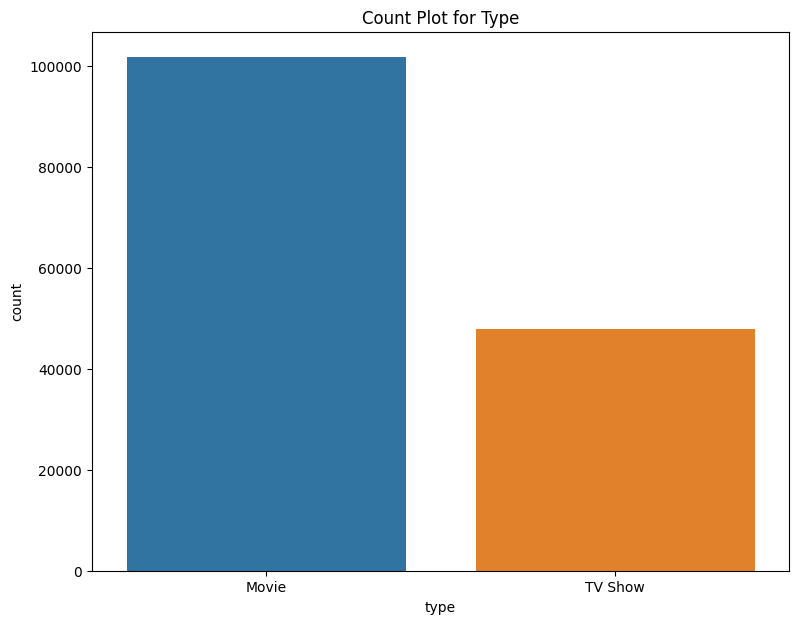

In [ ]:
#1.b
# Graphical analysis for "type"
plt.figure(figsize=(9, 7))
sns.countplot(x='type', data=df)
plt.title('Count Plot for Type')
plt.show()



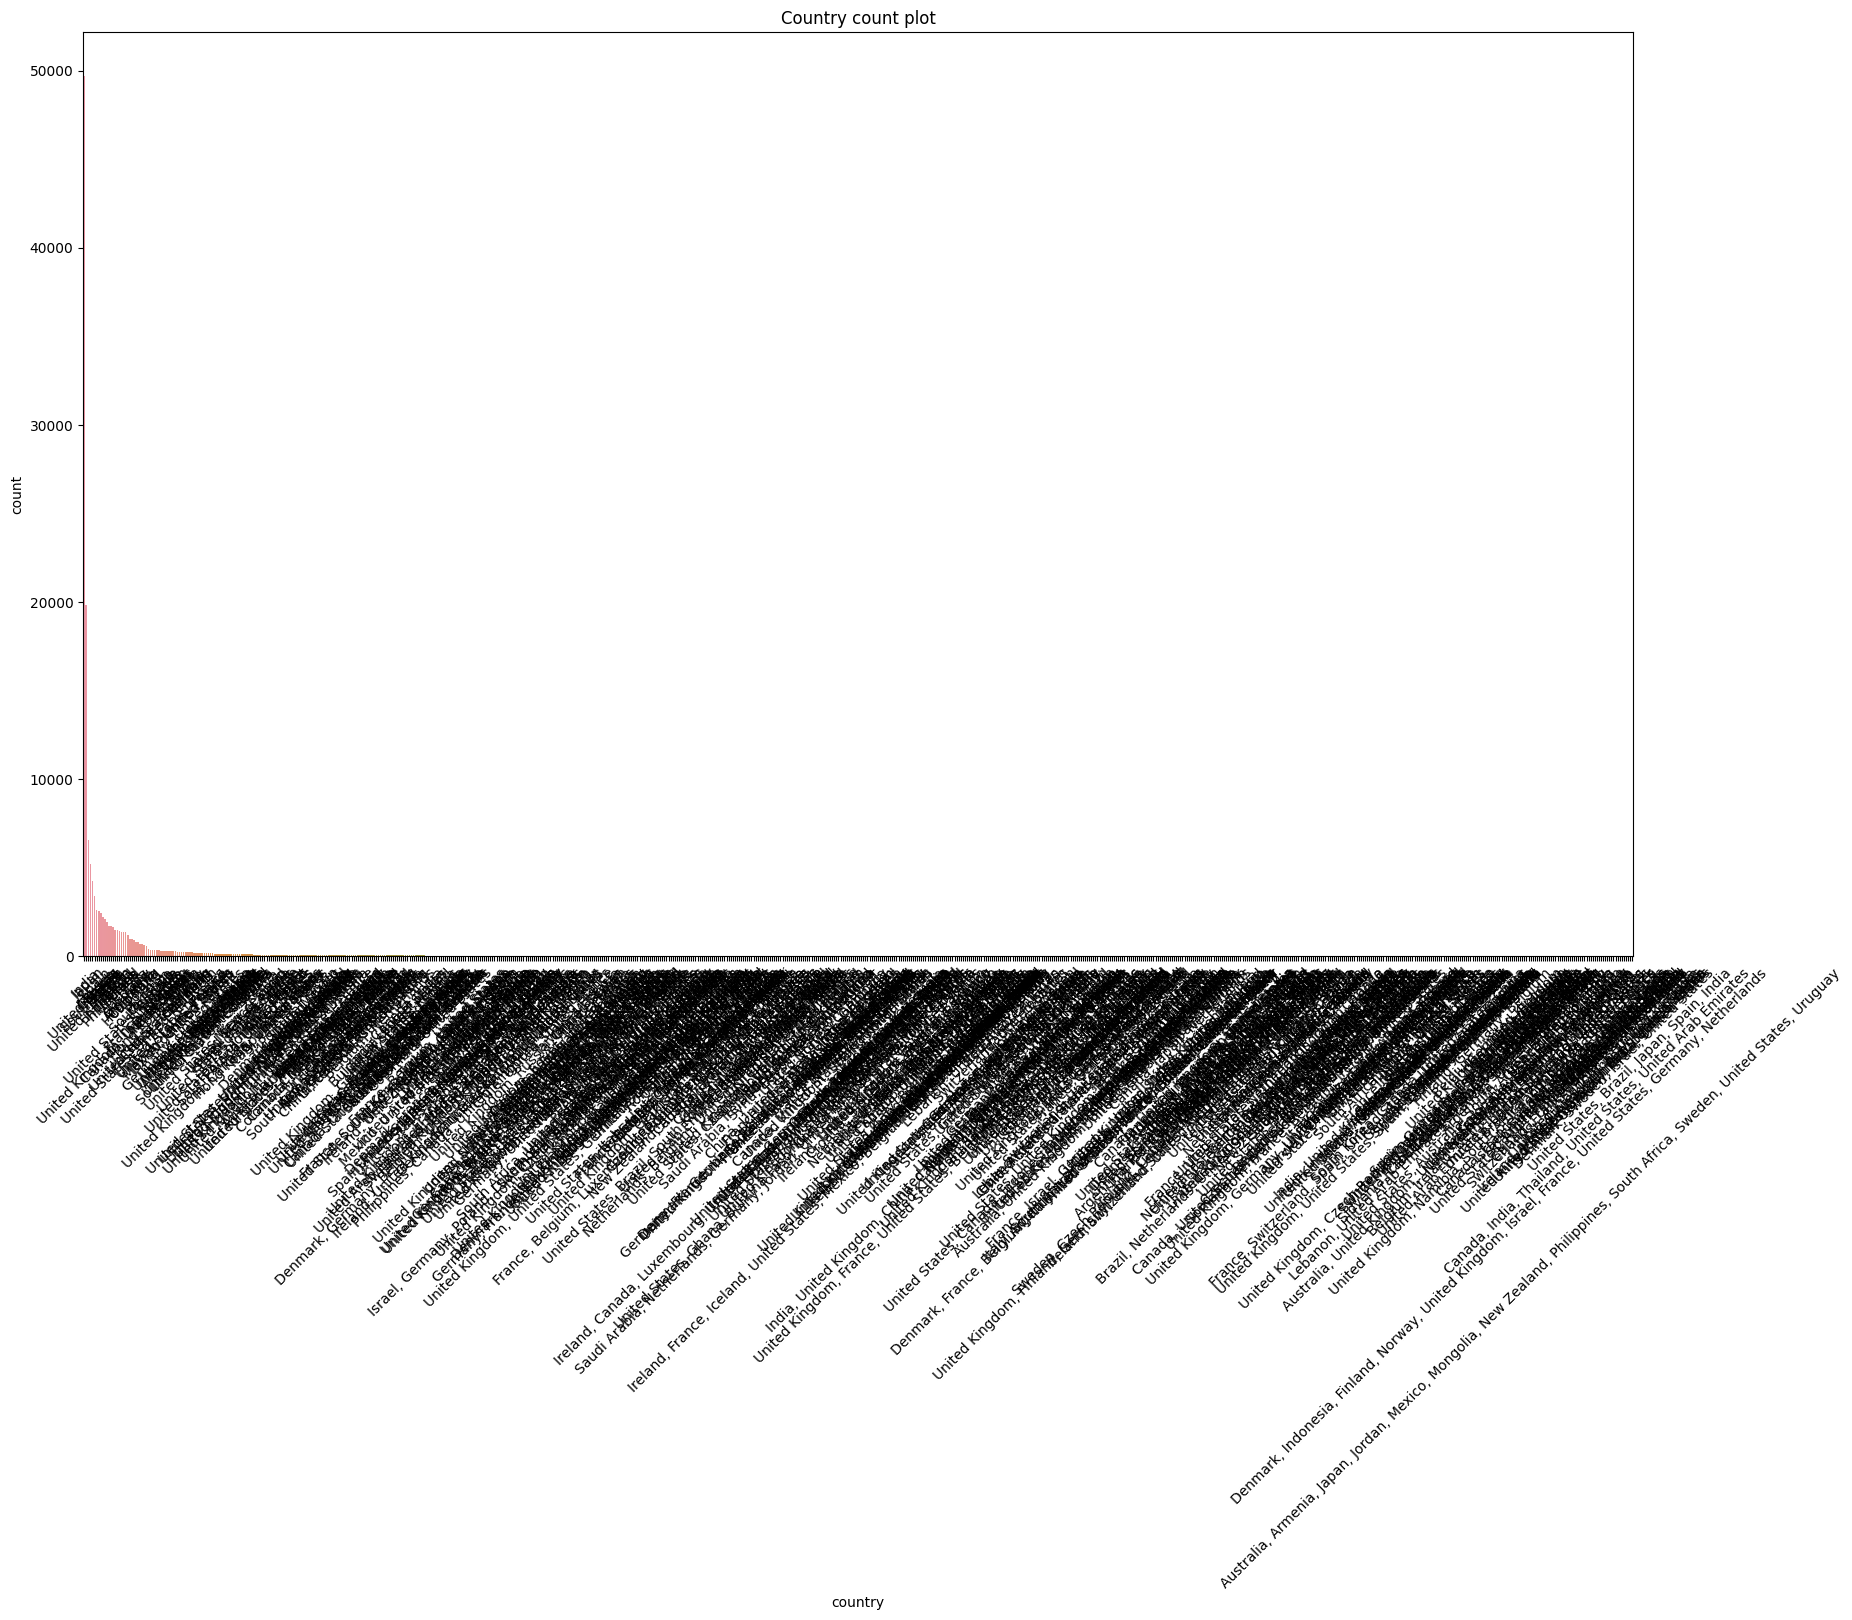

In [ ]:
# Graphical analysis for "country"
plt.figure(figsize=(20, 12))
sns.countplot(x='country', data=df, order=df['country'].value_counts().index)
plt.title('Country count plot')
plt.xticks(rotation=45)
plt.show()


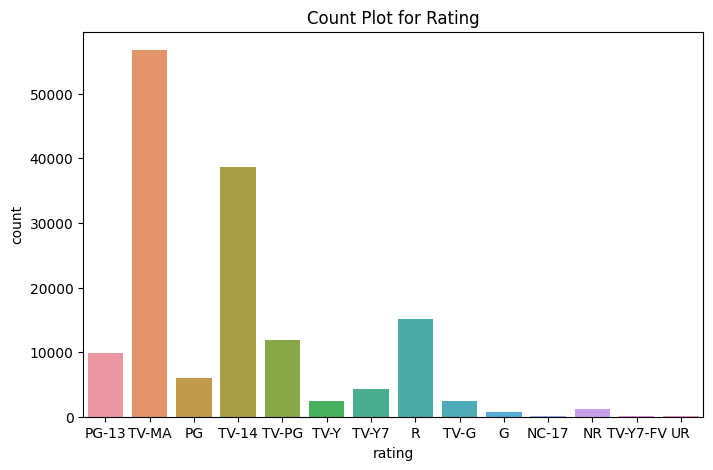

In [ ]:

# Graphical analysis for "rating"
plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=df)
plt.title('Count Plot for Rating')
plt.show()

In [ ]:
#2.a Movies vs TV Shows
#Filter only movies
movies_df = df[df['type'] == 'Movie']

# Group by country and find the count of unique titles of movies
movies_per_country = movies_df.groupby('country')['title'].nunique().reset_index()

# Sort in descending order and pick the top 10
top_10_countries = movies_per_country.sort_values(by='title', ascending=False).head(10)

# Display the result
print("Top 10 countries with the most movies:")
print(top_10_countries)


Top 10 countries with the most movies:
            country  title
525   United States   2495
218           India    893
440  United Kingdom    206
50           Canada    122
384           Spain     97
128           Egypt     92
319         Nigeria     86
238       Indonesia     77
428          Turkey     76
278           Japan     76


In [ ]:
#2.b
# Filter only TV shows
tv_shows_df = df[df['type'] == 'TV Show']

# Group by country and find the count of unique titles of TV shows
tv_shows_by_country = tv_shows_df.groupby('country')['title'].nunique().reset_index()

# Sort in descending order and pick the top 10
top_10_countries_tv_shows = tv_shows_by_country.sort_values(by='title', ascending=False).head(10)

# Display the result
print("Top 10 countries with the most TV shows:")
print(top_10_countries_tv_shows)

Top 10 countries with the most TV shows:
            country  title
160   United States   1151
140  United Kingdom    213
83            Japan    169
120     South Korea    158
66            India     79
132          Taiwan     68
17           Canada     59
47           France     49
4         Australia     48
125           Spain     48


In [ ]:
#Best time to launch TV Show:
#Q3a.best week to release the Tv-show or the movie.


# Convert 'date_added' to datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract the week number and create a new column
df['week_added'] = df['date_added'].dt.week

# Group by week and type  and count the total number of shows
weekly_counts = df.groupby(['week_added', 'type']).size().reset_index(name='count')

# Separate the data for TV Shows
tv_shows_weekly_counts = weekly_counts[weekly_counts['type'] == 'TV Show']



# Find the best week for TV shows
best_week_tv_show = tv_shows_weekly_counts.loc[tv_shows_weekly_counts['count'].idxmax()]



print("\nBest Week for TV Shows:")
print(best_week_tv_show)

<ipython-input-20-91e711a9b6cd>:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week_added'] = df['date_added'].dt.week



Best Week for TV Shows:
week_added       27.0
type          TV Show
count            1816
Name: 53, dtype: object


In [ ]:
#Best time to launch Movies:
# Convert 'date_added' to datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract the week number and create a new column
df['week_added'] = df['date_added'].dt.week

# Group by week and type  and count the total number of shows
weekly_counts = df.groupby(['week_added', 'type']).size().reset_index(name='count')
# Separate the data for Movies
movies_weekly_counts = weekly_counts[weekly_counts['type'] == 'Movie']

# Find the best week for movies
best_week_movie = movies_weekly_counts.loc[movies_weekly_counts['count'].idxmax()]


print("Best Week for Movies:")
print(best_week_movie)


Best Week for Movies:
week_added      1.0
type          Movie
count          5804
Name: 0, dtype: object


<ipython-input-21-d9bcc82d2ef5>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week_added'] = df['date_added'].dt.week


In [ ]:
#3.b
#best month to release the Tv-show.
# Convert 'date_added' to datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract the month and create a new column
df['month_added'] = df['date_added'].dt.month

# Group by month and type  and count the total number of shows
monthly_counts = df.groupby(['month_added', 'type']).size().reset_index(name='count')

# Separate the data for TV Shows

tv_shows_monthly_counts = monthly_counts[monthly_counts['type'] == 'TV Show']


# Find the best month for TV shows
best_month_tv_show = tv_shows_monthly_counts.loc[tv_shows_monthly_counts['count'].idxmax()]


print("\nBest Month for TV Shows:")
print(best_month_tv_show)


Best Month for TV Shows:
month_added        7.0
type           TV Show
count             4744
Name: 13, dtype: object


In [ ]:
#Best month to release the Movies.
# Convert 'date_added' to datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract the month and create a new column
df['month_added'] = df['date_added'].dt.month
# Separate the data for Movies
movies_monthly_counts = monthly_counts[monthly_counts['type'] == 'Movie']

# Find the best month for movies
best_month_movie = movies_monthly_counts.loc[movies_monthly_counts['count'].idxmax()]

print("Best Month for Movies:")
print(best_month_movie)


Best Month for Movies:
month_added      7.0
type           Movie
count           9608
Name: 12, dtype: object


In [ ]:
# Split the 'director' column into multiple directors if there are multiple names
df['director'] = df['director'].apply(lambda x: x.split(', ') if pd.notnull(x) else [])

# Explode the 'director' column to create multiple rows for each director
df_directors = df.explode('director')

# Group by each director and count the unique titles of TV shows/movies
director_counts = df_directors.groupby('director')['title'].nunique().reset_index(name='count')

# Sort the directors by count in descending order
top_directors = director_counts.sort_values(by='count', ascending=False).head(10)

# Display the result
print("Top 10 Directors with Most Titles:")
print(top_directors)


Top 10 Directors with Most Titles:
                 director  count
3748        Rajiv Chilaka     22
1906            Jan Suter     21
3799          Raúl Campos     19
2865         Marcus Raboy     16
4456          Suhas Kadav     16
1954            Jay Karas     15
755   Cathy Garcia-Molina     13
2944      Martin Scorsese     12
4940      Youssef Chahine     12
1951          Jay Chapman     12


In [ ]:
# Split the 'cast' column into multiple actors if there are multiple names
df['cast'] = df['cast'].apply(lambda x: x.split(', ') if pd.notnull(x) else [])

# Explode the 'cast' column to create multiple rows for each actor
df_actors = df.explode('cast')

# Group by each actor and count the unique titles of TV shows/movies
actor_counts = df_actors.groupby('cast')['title'].nunique().reset_index(name='count')

# Sort the actors by count in descending order
top_actors = actor_counts.sort_values(by='count', ascending=False).head(10)

# Display the result
print("Top 10 Actors with Most Titles:")
print(top_actors)

Top 10 Actors with Most Titles:
                   cast  count
2833        Anupam Kher     43
30489    Shah Rukh Khan     35
16697     Julie Tejwani     33
24215  Naseeruddin Shah     32
32591  Takahiro Sakurai     32
28974      Rupa Bhimani     31
846        Akshay Kumar     30
25424           Om Puri     30
35880         Yuki Kaji     29
1774   Amitabh Bachchan     28


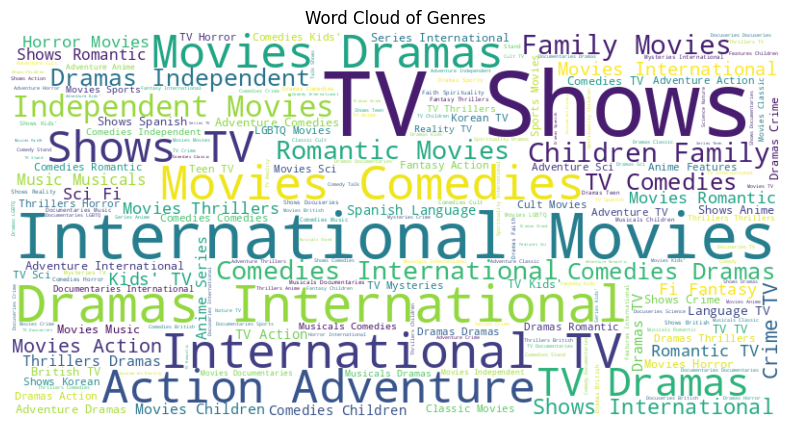

In [ ]:
#5.Which genre movies are more popular or produced more
# Combine the 'listed_in' column into a single string
all_genres = ' '.join(df['listed_in'].astype(str).values)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_genres)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Genres')
plt.show()


In [ ]:
#6. After how many days the movie will be added to Netflix after the release of the movie

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['release_year'] = pd.to_datetime(df['release_year'], format='%Y', errors='coerce')

# Calculate the difference in days between date_added and release_year
df['days_to_addition'] = (df['date_added'] - df['release_year']).dt.days

# Filter out rows where 'days_to_addition' is negative
df_positive_diff = df[df['days_to_addition'] >= 0]

# Find the mode of the differences
mode_days_to_addition = df_positive_diff['days_to_addition'].mode().values[0]

print(f"The mode of days between release and addition to Netflix is: {mode_days_to_addition} days")

The mode of days between release and addition to Netflix is: 243.0 days


<ipython-input-29-7f91531b3ac8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['release_year'], bins=30, kde=True)


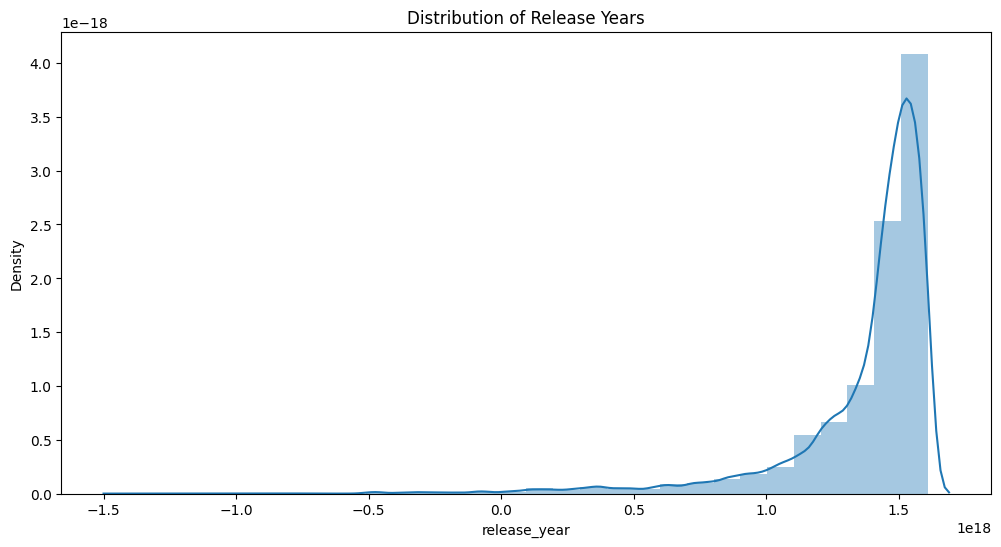

In [ ]:
# Visualize the distribution of release years
plt.figure(figsize=(12, 6))
sns.distplot(df['release_year'], bins=30, kde=True)
plt.title('Distribution of Release Years')
plt.show()

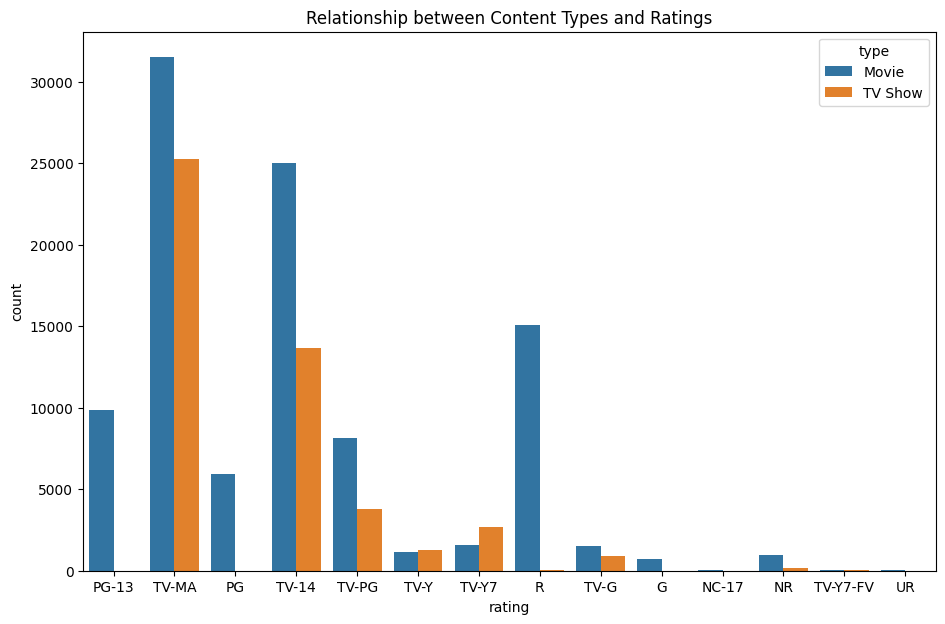

In [ ]:
# Bivariate Analysis

# Explore the relationship between content types and ratings
plt.figure(figsize=(11, 7))
sns.countplot(x='rating', hue='type', data=df)
plt.title('Relationship between Content Types and Ratings')
plt.show()

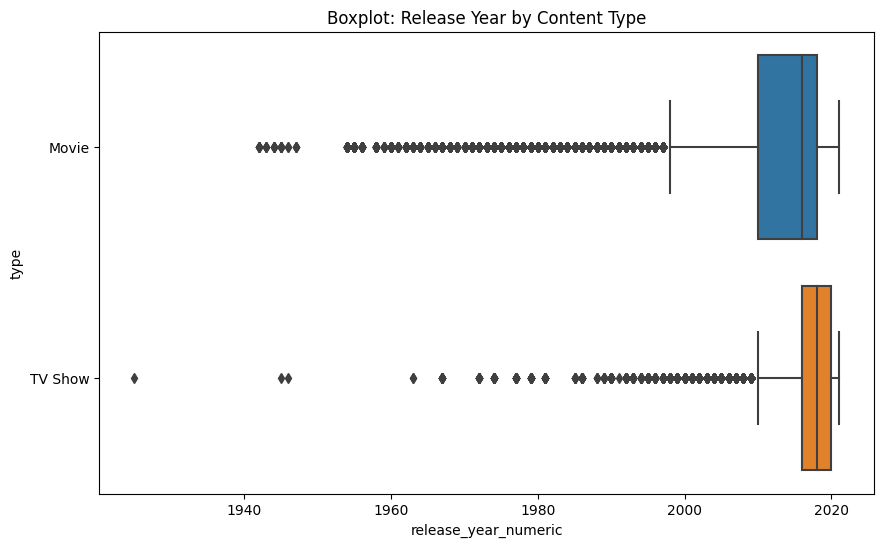

In [ ]:
# Extracting the year from the 'release_year' column
df['release_year_numeric'] = df['release_year'].dt.year

# Boxplot for Categorical Variable (Type) vs Continuous Variable (Release Year)
plt.figure(figsize=(10, 6))
sns.boxplot(x='release_year_numeric', y='type', data=df)
plt.title('Boxplot: Release Year by Content Type')
plt.show()